In [1]:
import pandas as pd

data = pd.read_csv("data/time_sheet.csv")
data.tail()

,Date,Day,work,ds_project,coding,planning
150,2020-12-03,Thursday,6.5,0.0,0,0.0
151,2020-12-04,Friday,2.0,0.0,0,0.0
152,2020-12-05,Saturday,0.0,0.0,0,0.0
153,2020-12-06,Sunday,1.0,0.0,0,0.0
154,2020-12-07,Monday,4.5,1.5,0,0.5


### Add New Date

In [2]:
data = data.append(
    {
        "Date" : "2020-12-08",
        "Day" : "Monday",
        "work" : 3,
        "ds_project" : 0,
        "coding" : 0,
        "planning" : 0 
        
    }, 
        ignore_index=True,
)

data.tail()

,Date,Day,work,ds_project,coding,planning
151,2020-12-04,Friday,2.0,0.0,0,0.0
152,2020-12-05,Saturday,0.0,0.0,0,0.0
153,2020-12-06,Sunday,1.0,0.0,0,0.0
154,2020-12-07,Monday,4.5,1.5,0,0.5
155,2020-12-08,Monday,3.0,0.0,0,0.0


### Update Value

In [5]:
data.loc[data["Date"] == "2020-12-07", "work"] = 5
# data.drop("wwork", axis=1, inplace=True)
data.tail()

,Date,Day,work,ds_project,coding,planning
151,2020-12-04,Friday,2.0,0.0,0,0.0
152,2020-12-05,Saturday,0.0,0.0,0,0.0
153,2020-12-06,Sunday,1.0,0.0,0,0.0
154,2020-12-07,Monday,5.0,1.5,0,0.5
155,2020-12-08,Monday,3.0,0.0,0,0.0


### Plotting

In [6]:
import datetime

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
%matplotlib inline

# compute total
# data = pd.read_csv("data/time_sheet.csv")
data["Total"] = data["work"] + data["ds_project"] + data["coding"] + data["planning"] 
data.tail()

,Date,Day,work,ds_project,coding,planning,Total
151,2020-12-04,Friday,2.0,0.0,0,0.0,2.0
152,2020-12-05,Saturday,0.0,0.0,0,0.0,0.0
153,2020-12-06,Sunday,1.0,0.0,0,0.0,1.0
154,2020-12-07,Monday,5.0,1.5,0,0.5,7.0
155,2020-12-08,Monday,3.0,0.0,0,0.0,3.0


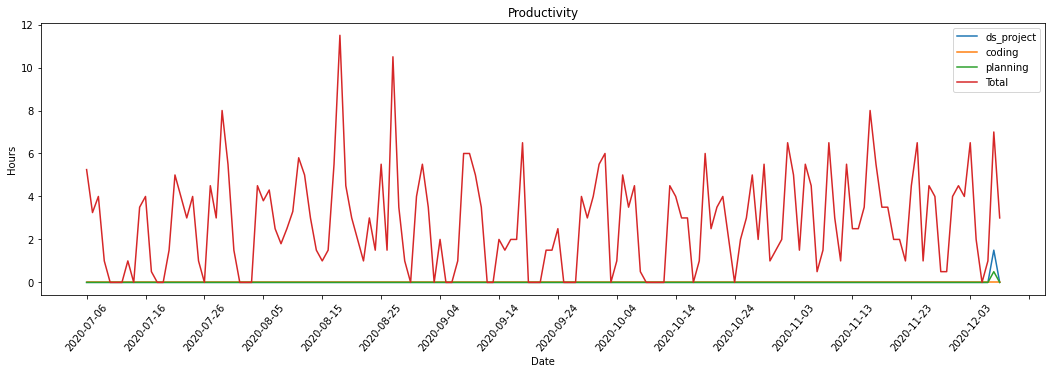

In [7]:
# Initiate the plot 
fig, ax = plt.subplots()
ax.plot("Date", "ds_project", data=data)
ax.plot("Date", "coding", data=data)
ax.plot("Date", "planning", data=data)
ax.plot("Date", "Total", data=data)

# labels and legend 
ax.set(xlabel='Date', ylabel='Hours', title='Productivity')
plt.legend()

# rotate x-axis and set max num of ticks displayed 
plt.xticks(data.index, rotation=50)
ax.xaxis.set_major_locator(plt.MaxNLocator(20)) 

# resize img 
fig.set_size_inches(18, 5)
plt.savefig('time_sheet.png')